# <font color='red'> Practice Project

# Advanced Regression (Airbnb dataset)

## Intorduction
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

## Data description
There are total 16 attributes and 48895 instances, 6 of attributes are categorical variable, others are numerical data.
The meaning of each variable:

id: listing ID(unique)

name: name of the listing(listing title)

host_id: host ID

host_name: name of the host

neighbourhood_group: location(city)

neighbourhood: area(district)

latitudelatitude: coordinates

longitudelongitude: coordinates

room_typelisting: space type (3 types: 'Private room', 'Entire home/apt', 'Shared room')

price: price in dollars

minimum_nights: amount of nights minimum

number_of_reviews: number of reviews

last_review: latest review date

reviews_per_month: number of average reviews per month

calculated_host_listings_count: amount of listing per host

availability_365: number of days when listing is available for booking

In [271]:
import os
os.chdir("C:/Users/howar/Desktop/ML")
df=pd.read_csv("AB_NYC_2019.csv")

In [272]:
df.shape

(48895, 16)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [274]:
random.seed(123)
x = df.sample(n=1000).index
df.loc[x,'price'] = None
#df['price'].isnull().sum()

In [275]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              1000
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [276]:
# check if all the value in this column are unique (making sure no duplicate row)
a = df.id.unique()
len(a)-1

48894

In [277]:
u_room = df.room_type.unique()
u_room

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [278]:
# note: some variable should be categorical
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,47895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.696085,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.882569,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,105.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [279]:
df.describe(include = 'O')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


## Data Cleaning

### 1. Dropping unnecessary columns

In [280]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

### 2. Dealing with missing values
Replace NaN in reviews_per_month into 0,
if it's NaN, it's because no one left a review or it's a new airbnb

In [281]:
x = df['number_of_reviews'] == 0
df[x]['reviews_per_month']

2       NaN
19      NaN
26      NaN
36      NaN
38      NaN
193     NaN
204     NaN
260     NaN
265     NaN
267     NaN
276     NaN
345     NaN
349     NaN
390     NaN
425     NaN
432     NaN
437     NaN
486     NaN
545     NaN
585     NaN
627     NaN
629     NaN
633     NaN
658     NaN
661     NaN
703     NaN
728     NaN
732     NaN
763     NaN
791     NaN
         ..
48865   NaN
48866   NaN
48867   NaN
48868   NaN
48869   NaN
48870   NaN
48871   NaN
48872   NaN
48873   NaN
48874   NaN
48875   NaN
48876   NaN
48877   NaN
48878   NaN
48879   NaN
48880   NaN
48881   NaN
48882   NaN
48883   NaN
48884   NaN
48885   NaN
48886   NaN
48887   NaN
48888   NaN
48889   NaN
48890   NaN
48891   NaN
48892   NaN
48893   NaN
48894   NaN
Name: reviews_per_month, Length: 10052, dtype: float64

In [282]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.isnull().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1000
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [283]:
df.fillna({'price':106}, inplace=True)
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Visualization

### 1. Price
Note: There are some outliers, and the distribution is right skewed(positive skewed)

C:\Users\howar\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



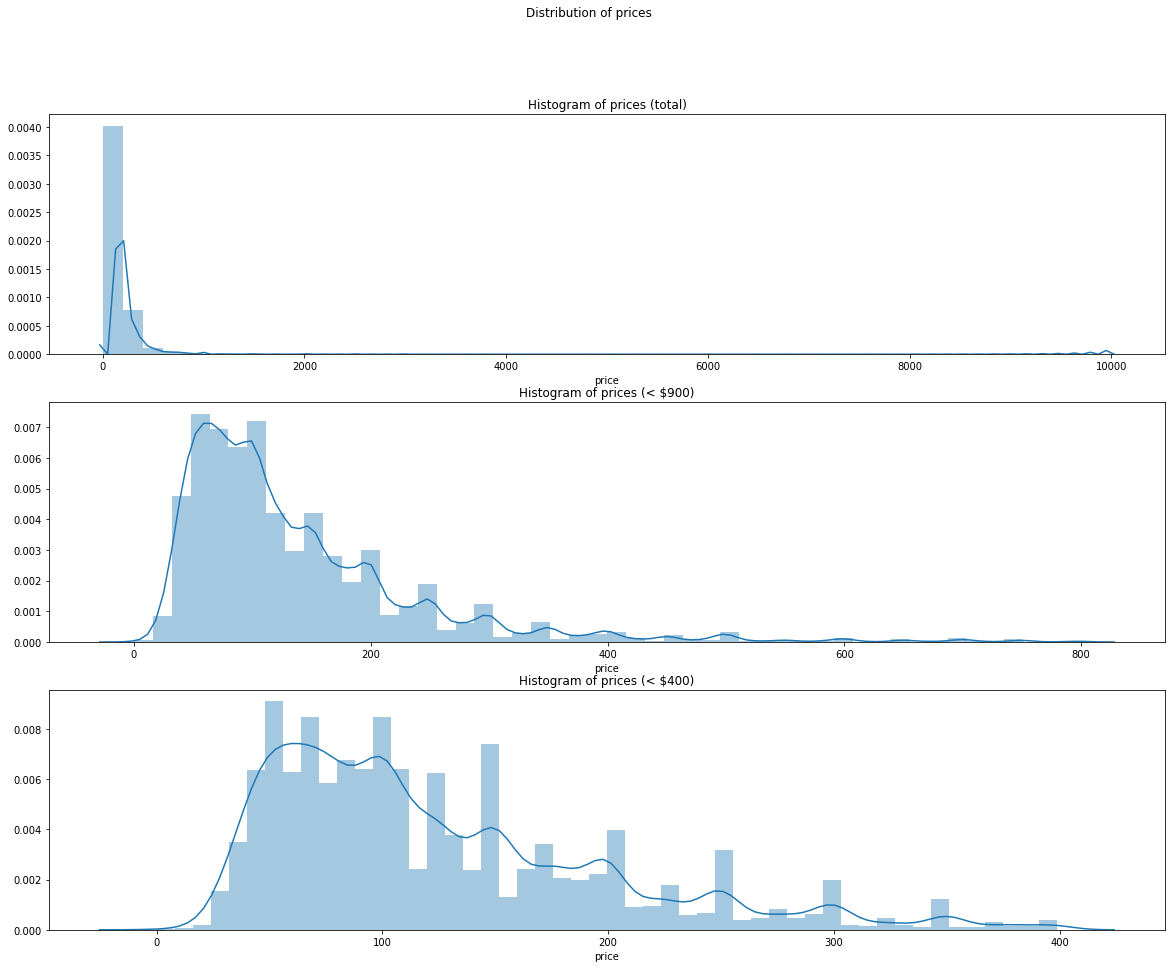

In [243]:
fig, ax= plt.subplots(3,1, figsize=(20,15))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(df['price'], ax=ax[0])
ax[1].set_title("Histogram of prices (< $900)")
sns.distplot(df[df['price'] < 800]['price'], ax=ax[1])
ax[2].set_title("Histogram of prices (< $400)")
sns.distplot(df[df['price'] < 400]['price'], ax=ax[2])

fig.suptitle("Distribution of prices")
fig.show()

Note: Manhattan Price has the overall higher than others.

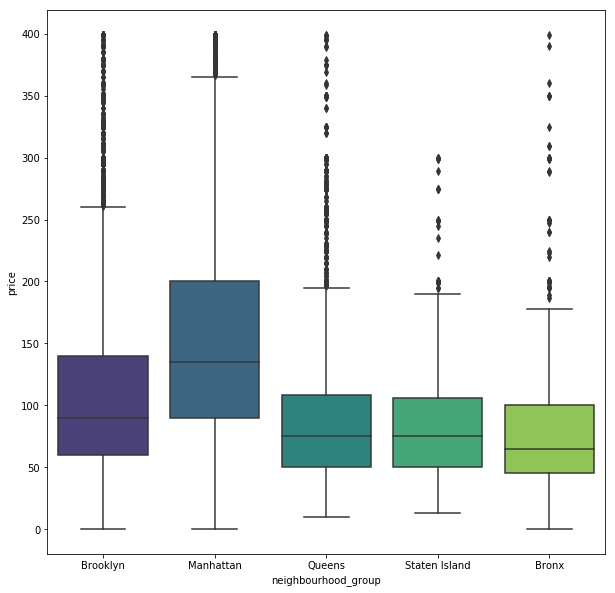

In [244]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y=df[df['price'] < 400]['price'],palette='viridis')

Note: Entire Home has higher prices than other room type

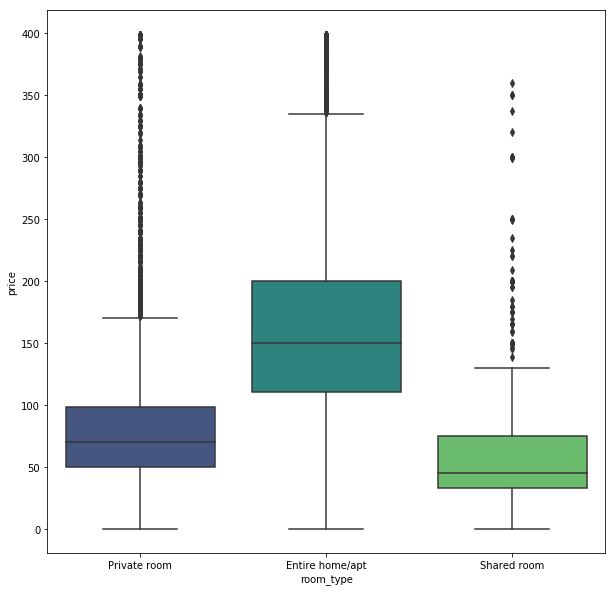

In [245]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='room_type',y=df[df['price'] < 400]['price'],palette='viridis')

### 2. Host
Note: Some of host were host more than once, let's see who are those who host more times.

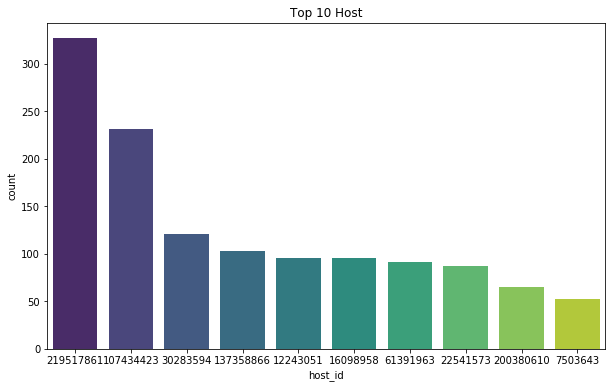

In [246]:
plt.figure(1, figsize=(10, 6))
plt.title("Top 10 Host")
sns.countplot(x = "host_id", order=df['host_id'].value_counts().index[0:10] ,data=df,palette='viridis')

Note: From below, it seems like the price doesn't have obvious influence to the host rank.

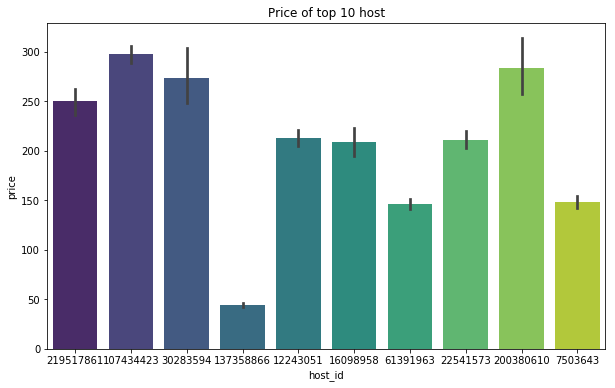

In [247]:
plt.figure(1, figsize=(10, 6))
plt.title("Price of top 10 host")
sns.barplot(x = "host_id", order=df['host_id'].value_counts().index[0:10], y = "price", data = df, palette='viridis')

### 3. Let's have a clearer look of NY city

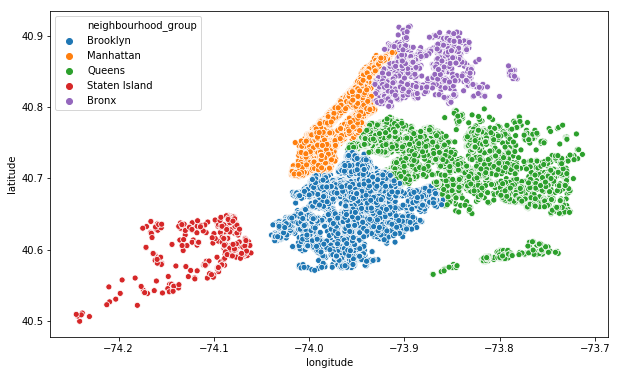

In [248]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

Note: Most of expensive Airbnb house are in Manhattan and Brooklyn.

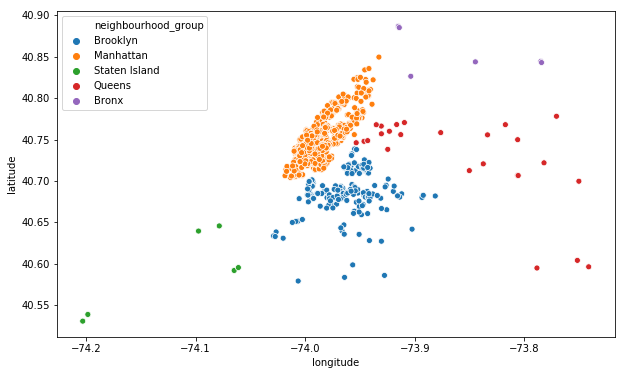

In [249]:
# price 585: 2 std away from mean
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group.where(df['price']>=585))
plt.ioff()

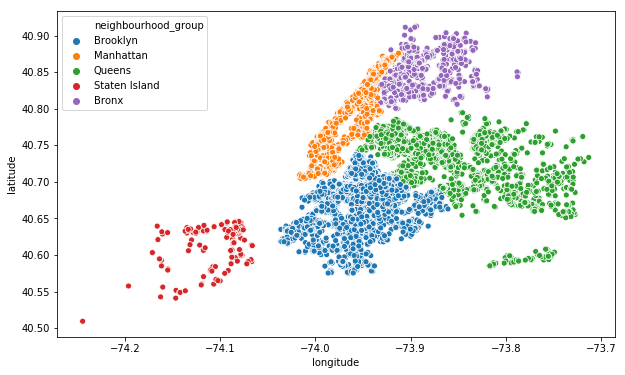

In [250]:
# the cheapest 25% data
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group.where(df['price']<=70))
plt.ioff()

Note: From below, there isn't a room_type that concentrated in specific neighborhood_group

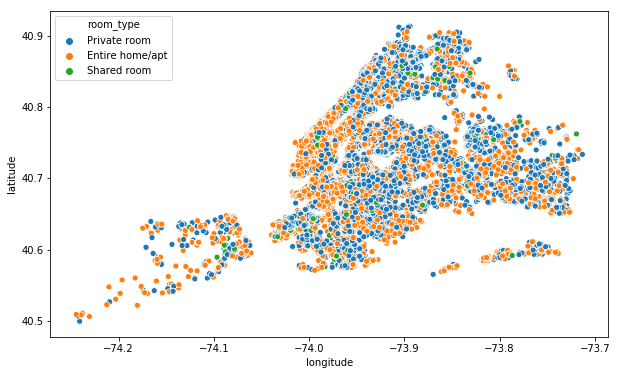

In [251]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

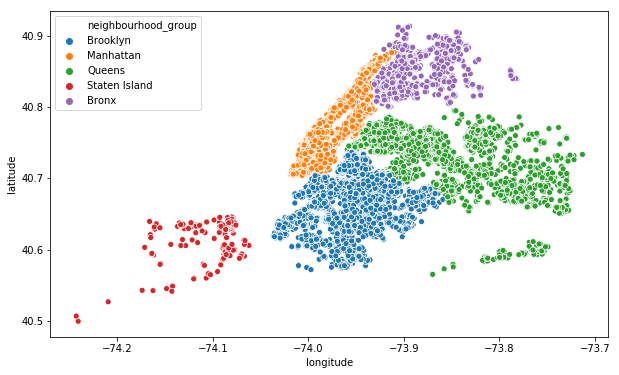

In [252]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group.where(df['room_type']=="Private room"))
plt.ioff()

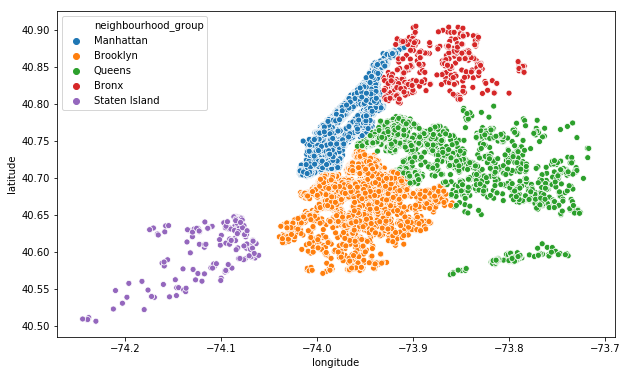

In [253]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group.where(df['room_type']=="Entire home/apt"))
plt.ioff()

Note:We can see that Shared room are the least room_type among the others

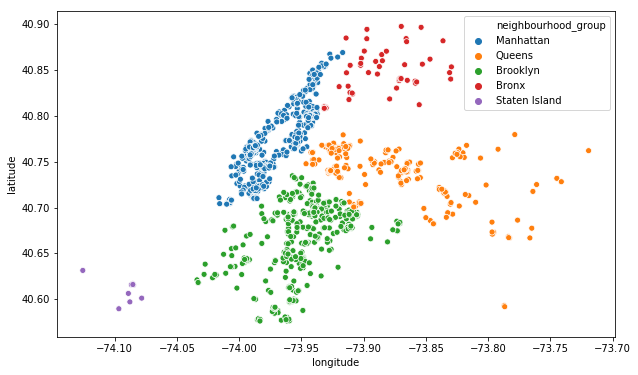

In [254]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group.where(df['room_type']=="Shared room"))
plt.ioff()

### Distribution of some numerical feature (except price)
Note: Most of variable have outliers

C:\Users\howar\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



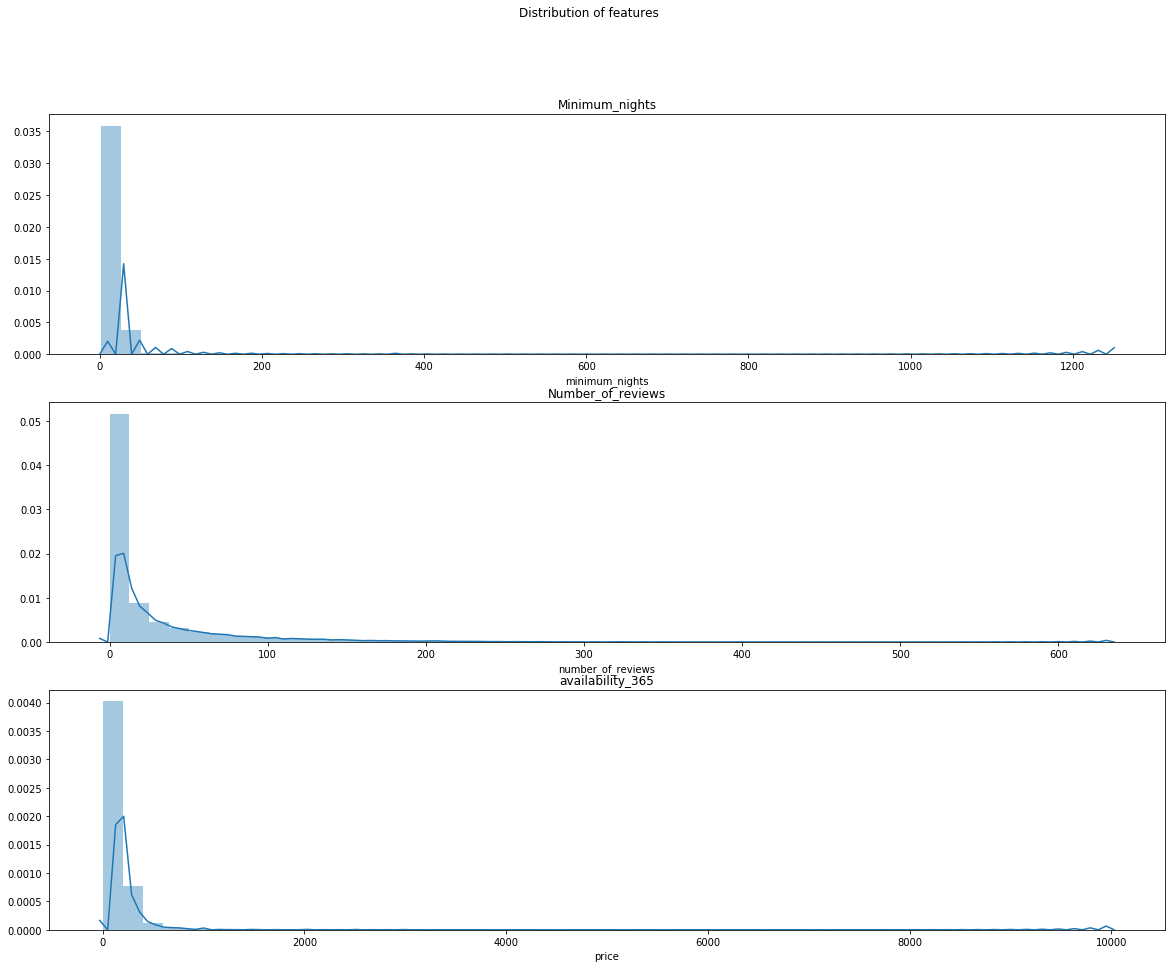

In [255]:
fig, ax= plt.subplots(3,1, figsize=(20,15))

ax[0].set_title("Minimum_nights")
sns.distplot(df['minimum_nights'], ax=ax[0])
ax[1].set_title("Number_of_reviews")
sns.distplot(df['number_of_reviews'], ax=ax[1])
ax[2].set_title("availability_365")
sns.distplot(df[df['availability_365'] < 400]['price'], ax=ax[2])

fig.suptitle("Distribution of features")
fig.show()

## Changing Variable type

#### changing neighbourhood_group

In [284]:
len(df['neighbourhood_group'].unique())

5

In [285]:
neighbourhood_group = pd.get_dummies(df['neighbourhood_group'],columns='neighbourhood_group',prefix='neighbourhood_group') 
df=pd.concat([df, neighbourhood_group], axis=1)

In [286]:
df.drop(['neighbourhood_group'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
host_id                              48895 non-null int64
neighbourhood                        48895 non-null object
latitude                             48895 non-null float64
longitude                            48895 non-null float64
room_type                            48895 non-null object
price                                48895 non-null float64
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    48895 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourho

#### changing neighbourhood

In [258]:
# neighbourhood = pd.get_dummies(df['neighbourhood'],columns='neighbourhood',prefix='neighbourhood') 
# df=pd.concat([df, neighbourhood], axis=1)

In [287]:
df.drop(['neighbourhood'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
host_id                              48895 non-null int64
latitude                             48895 non-null float64
longitude                            48895 non-null float64
room_type                            48895 non-null object
price                                48895 non-null float64
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    48895 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourhood_group_Staten Island    48895 non-null uint8
dtypes: floa

#### changing room_type

In [32]:
# room_type = pd.get_dummies(df['room_type'],columns='room_type',prefix='room_type') 
# df=pd.concat([df, room_type], axis=1)

In [288]:
df.drop(['room_type'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
host_id                              48895 non-null int64
latitude                             48895 non-null float64
longitude                            48895 non-null float64
price                                48895 non-null float64
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    48895 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourhood_group_Staten Island    48895 non-null uint8
dtypes: float64(4), int64(5), uint8(5)
memory usage: 3.6 MB


In [289]:
df.drop(['host_id'], axis=1,inplace=True)
df.drop(['latitude'], axis=1,inplace=True)
df.drop(['longitude'], axis=1,inplace=True)

### After changing the variable, now we have 238 columns

## Split Train Test

In [444]:
al = list(df.columns.values)
for i in range(len(al)) :
    if al[i] == 'price':
        al.pop(i)
        break
al

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island']

In [445]:
X_features = al 

X = df[X_features]
X.info()
Y = df[['price']]
Y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    48895 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourhood_group_Staten Island    48895 non-null uint8
dtypes: float64(1), int64(4), uint8(5)
memory usage: 2.1 MB


,price
0,149.0
1,225.0
2,150.0
3,89.0
4,80.0


In [446]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [421]:
X_test_org

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
38543,4,26,4.29,1,278,0,0,1,0,0
28615,1,12,0.68,3,89,0,1,0,0,0
31930,1,26,1.91,1,0,0,1,0,0,0
8679,4,34,0.79,2,286,0,1,0,0,0
9387,2,151,3.16,1,36,0,1,0,0,0
40490,1,8,2.79,1,80,0,1,0,0,0
30291,1,42,2.50,3,15,0,1,0,0,0
48470,2,0,0.00,1,74,0,1,0,0,0
27272,3,1,0.05,1,0,0,1,0,0,0
9002,4,2,0.04,1,0,0,0,0,1,0


## Linear Regression

In [447]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train_org)
X_test = rs.transform(X_test_org)

In [448]:
# mm = MinMaxScaler()
# X_train = mm.fit_transform(X_train_org)
# X_test = mm.transform(X_test_org)

In [449]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[ 6.60465383e-01 -4.44153794e+00 -6.33328294e+00  3.11026689e-02
   4.01120372e+01 -4.57443144e+01  5.05733308e+00  7.10644844e+01
  -2.41975848e+01 -6.17991833e+00]]
lr.intercept_: [114.92632861]


In [450]:
from sklearn import metrics

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean Absolute Error: 86.81907400436938
Mean Squared Error: 56916.28968345273
Root Mean Squared Error: 238.57135134683026
r2_score: 0.037272719743308036


In [451]:
print("Training set score: {:.4f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))

Training set score: 0.0392
Test set score: 0.0373


Text(0, 0.5, 'Predictions')

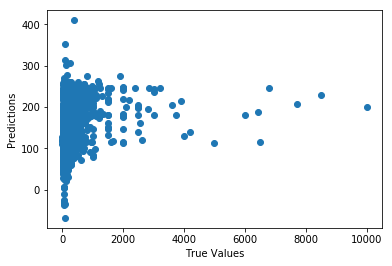

In [452]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Ridge Regression

In [453]:
from  sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10,100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_org,y_train)
    train_score_list.append(ridge.score(X_train_org,y_train))
    test_score_list.append(ridge.score(X_test_org, y_test))

Text(0.5, 0, '$\\alpha$')

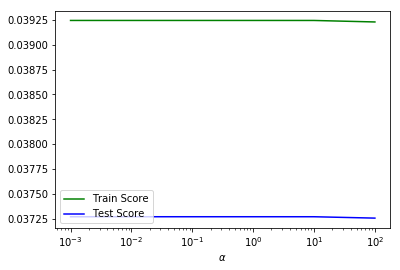

In [454]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [455]:
print(train_score_list)
print(test_score_list)

[0.039243215483744986, 0.03924321548356935, 0.03924321546600307, 0.03924321371197159, 0.039243040884330616, 0.03922800714919994]
[0.03727271975132551, 0.03727271982333147, 0.03727272052844732, 0.03727272608717114, 0.03727263445987772, 0.03725883542225472]


In [456]:
print(sum(train_score_list)/len(train_score_list))
print(sum(test_score_list)/len(test_score_list))

0.03924065136313659
0.037270392678734644


IndexError: index 1 is out of bounds for axis 1 with size 1

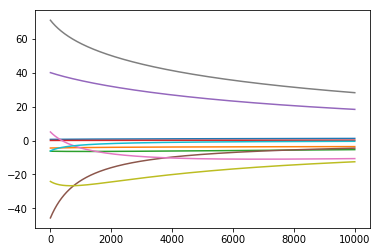

In [457]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,15):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso Regression

In [458]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01,random_state = 0, max_iter=10000)
lasso = lassoreg.fit(X_train, y_train)
print("Training set score: {:.4f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.0392
Test set score: 0.0373
Number of features used: 9


In [459]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

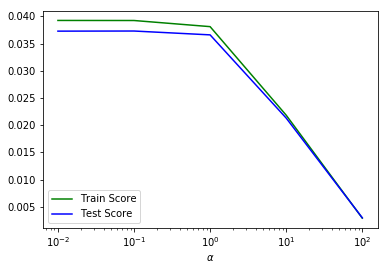

In [460]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

## Polynomial Regression

In [461]:
from sklearn.preprocessing import PolynomialFeatures

In [462]:
poly = PolynomialFeatures(2)
s = poly.fit_transform(X_train, y_train)

In [463]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lr.fit(X_train_poly, y_train)
    train_score_list.append(lr.score(X_train_poly, y_train))
    test_score_list.append(lr.score(X_test_poly, y_test))

In [464]:
print(train_score_list)
print(test_score_list)

[0.039243215483746874, 0.04823960200269295]
[0.03727271974330815, 0.037512799159085675]


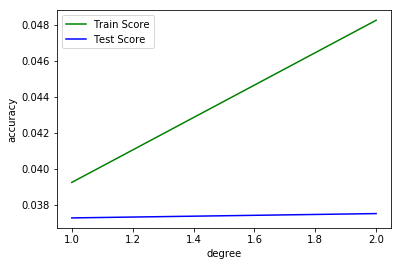

In [465]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

## SVM Regression linear

In [477]:
from sklearn.svm import LinearSVC
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [478]:
y_pred = regressor.predict(X_test)

In [479]:
print("Training set score: {:.4f}".format(regressor.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(regressor.score(X_test, y_test))) 

Training set score: 0.0048
Test set score: 0.0028


In [480]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean Absolute Error: 78.90759834791278
Mean Squared Error: 58955.69790031884
Root Mean Squared Error: 242.80794447529686
r2_score: 0.002776551126619786


## SVM Regression rbf

In [468]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [470]:
y_pred = regressor.predict(X_test)

In [474]:
print("Training set score: {:.4f}".format(regressor.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(regressor.score(X_test, y_test))) 

Training set score: 0.0070
Test set score: 0.0031


In [473]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean Absolute Error: 76.93701440730693
Mean Squared Error: 58937.91580112491
Root Mean Squared Error: 242.77132409146864
r2_score: 0.0030773316604429946


## KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

## Linear Regression with Cross Validation

In [428]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
kfold = KFold(n_splits=5)

In [429]:
scores = cross_val_score(lr, X_train, y_train, cv=kfold)
print("Cross-validation scores:\n{}".format(cross_val_score(lr, X_train, y_train, cv=kfold)))

Cross-validation scores:
[0.056889   0.04271605 0.04901075 0.03905511 0.0323474 ]


In [430]:
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Average cross-validation score: 0.0440


In [431]:
y_pred = cross_val_predict(lr, X_train, y_train, cv=kfold)

In [432]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print("r2_score:",r2_score(y_train,y_pred))

Mean Absolute Error: 84.20574195000854
Mean Squared Error: 48578.65437445569
Root Mean Squared Error: 220.40565867158605
r2_score: 0.04242956916719787


## Ridge Regression with Grid Search

In [ ]:

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


best_score = 0

x_range = [0.001, 0.01, 0.1, 1, 10,100]
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    score = ridge.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha':alpha}
        
ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)

print("Best score on validation set: {:.4f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.4f}".format(test_score))

## Lasso Regression with Grid Search

In [ ]:
best_score = 0

x_range = [0.001, 0.01, 0.1, 1, 10,100]
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    score = lasso.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha':alpha}
        
lasso = Lasso(**best_parameters)
lasso.fit(X_trainval, y_trainval)
test_score = lasso.score(X_test, y_test)

print("Best score on validation set: {:.4f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.4f}".format(test_score))

## Ridge Regression with Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
best_score = 0
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha = alpha)
    # perform cross-validation
    scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)

In [ ]:
param_grid = {'alpha' : [0.001, 0.01, 0.1, 1, 10,100]}

In [ ]:
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

In [375]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: 0.0354


## Lasso Regression with Grid Search Cross Validation

In [ ]:
best_score = 0
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    lasso = Lasso(alpha = alpha)
    # perform cross-validation
    scores = cross_val_score(lasso, X_trainval, y_trainval, cv=5)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(X_trainval, y_trainval)

In [381]:
param_grid = {'alpha' : [0.001, 0.01, 0.1, 1, 10,100]}

In [ ]:
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

In [384]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.0354
